### Поиск дубликатов

In [1]:
def dubl_finder (data):
    """_Искатель дубликатов_

    Args:
        data (_pandas.core.frame.DataFrame_): _Датасет_
        
    Returns:
        _int_: _Число найденных дублей_
    """
    dubl_columns = list(data.columns)
    mask = data.duplicated(subset=dubl_columns)
    data_dublicates = data[mask]
    return(f'Число найденных дубликатов: {data_dublicates.shape[0]}')

### Поиск пропусков

In [2]:
def null_finder (data):
    """_Искатель пропусков_

    Args:
        data (_pandas.core.frame.DataFrame_): _Датасет_

    Returns:
        _pandas.core.series.Series_: _столбцы с null и доля null в процентах_
    """
    cols_null_percent = data.isnull().mean() * 100
    cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
    return cols_with_null

In [ ]:
def plots(data, column_name):
    """
    Функция для построения гистограммы и коробчадой диагррамы
    для визуализации выбросов

    :data: Исходный датафрейм
    :column_name: Имя признака для анализа
    :return: Выводит график
    """

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # (18, 8)
    histplot = sns.histplot(data=data, x=column_name, ax=axes[0]) 
    boxplot = sns.boxplot(data=data, x=column_name, ax=axes[1]) 
    histplot.set_title(f'{column_name} Histogram') 
    boxplot.set_title(f'{column_name} Boxplot') 
    
    plt.tight_layout()
    plt.show()

In [1]:
def corr_bars(data, target):
    """_Функция для построения графика корреляции признаков_

    Args:
        data : Исходный датасет
        target (_type_): Целевой признак
    """
    import matplotlib.pyplot as plt #для визуализации
    import seaborn as sns #для визуализации
    %matplotlib inline
    plt.style.use('seaborn') #установка стиля matplotlib
    corr_with_target = data.corr()[target].abs().sort_values()
    corr_with_target = corr_with_target.drop(target)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(corr_with_target.index, corr_with_target.values)
    ax.set_title('Correlations with target') #название графика
    ax.set_xlabel(target) #название оси x
    ax.set_ylabel('Сorrelation coefficient'); #название оси y

In [ ]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

In [ ]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

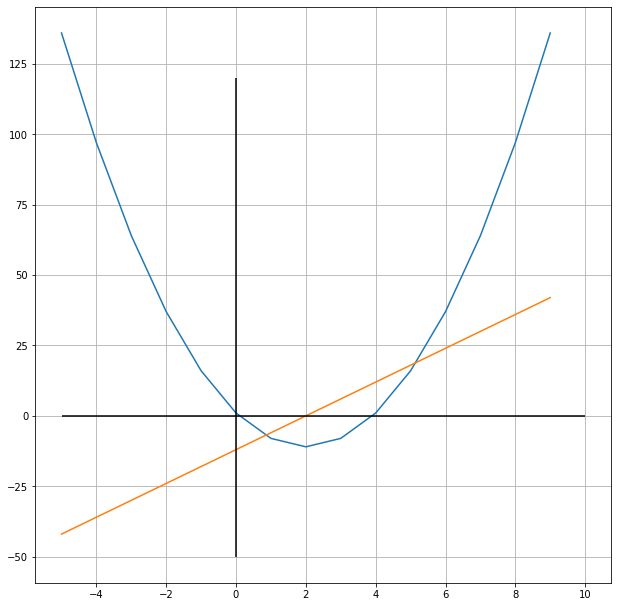

In [45]:
import matplotlib.pyplot as plt

x = []
y = []
y_1 = []

for i in range(-5,10):
    x.append(i)
    y.append(3*i*i-12*i+1)
    y_1.append(6*i-12)

fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.grid()
axes.plot(x,y)
axes.plot(x,y_1)
axes.vlines(0,-50,120, color='black')
axes.hlines(0,-5,10, color='black')

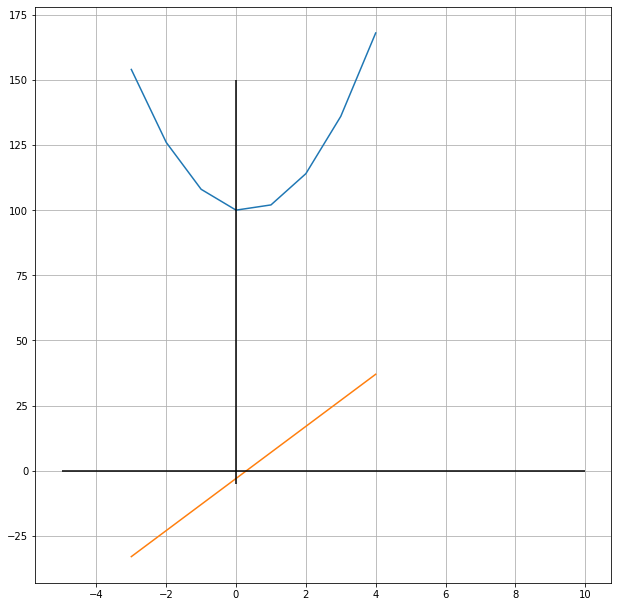

In [70]:
x = []
y = []
y_1 = []

for i in range(-3,5):
    x.append(i)
    y.append(5*i**2-3*i+100)
    y_1.append(10*i-3)

fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.grid()
axes.plot(x,y)
axes.plot(x,y_1)
axes.vlines(0,-5,150, color='black')
axes.hlines(0,-5,10, color='black')